# Урок 4

## Непрерывные случайные величины. Функция распределения и плотность распределения вероятностей. Равномерное и нормальное распределение. Центральная предельная теорема

### Непрерывные случайные величины

Ранее мы познакомились с дискретными случайными величинами. Такие величины принимают дискретные, т.е. разделимые значения. Например, это может быть конечное или счётное множество значений.

__Непрерывные случайные величины__ принимают все значения, содержащиеся в заданном промежутке. Промежуток может быть конечным или бесконечным.

Например, рост или вес человека — непрерывные случайные величины: они могут принимать любое значение в пределах от $0$ до бесконечности (потенциально).

Закон распределения вероятностей дискретной случайной величины мы задавали как соответствие между значениями $a_i$ случайной величины и соответствующими вероятностями $P(X = a_i)$. Для непрерывных случайных величин аналогичный подход невозможен, поскольку вероятность $P(X = a)$ для непрерывной случайной величины $X$ равна $0$ для любого $a$.

В связи с этим для непрерывных случайных величин вводят вместо этого __функцию распределения вероятностей__:

$$F(x) = P(X < x).$$

Функция распределения показывает, какова для каждого $x$ вероятность того, что случайная величина $X$ принимает значение меньше $x$. Эта функция монотонно возрастает на отрезке, на котором определена случайная величина. Кроме того, $F(-\infty) = 0$ и $F(\infty) = 1$.

__Пример 1__

Рассмотрим опять данные по хоккеистам и построим по ним _эмпирическую_ (т.е. полученную опытным путём) функцию распределения возраста хоккеистов.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251', parse_dates=['birth'])

In [12]:
# empirical distribution function

def edf(samples, x):
    return samples[samples < x].shape[0] / samples.shape[0]

С помощью `matplotlib` построим график данной функции в пределах от $10$ до $50$.

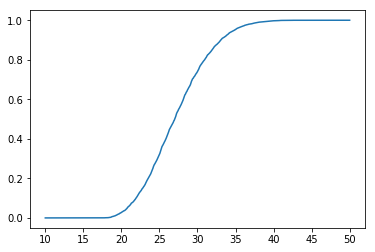

In [4]:
ox = np.linspace(10, 50, 1000)
oy = np.array([edf(df['age'], x) for x in ox])

plt.plot(ox, oy)

Аналогию с законом распределения вероятностей дискретной случайной величины удобно проводить с помощью __плотности распределения вероятностей__. Функция плотности распределения равна производной от функции распределения:

$$f(x) = F'(x).$$

Для непрерывной случайной величины площадь под графиком функции $f(x)$ равна $1$, аналогично тому, что сумма вероятностей значений дискретной случайной величины равна $1$.

Плотность распределения можно визуализировать с помощью гистограммы, передав в неё значение параметра `density=True`.

__Пример 2__

Построим гистограмму значений возраста хоккеистов, чтобы примерно представить, как выглядит соответствующая функция плотности распределения.

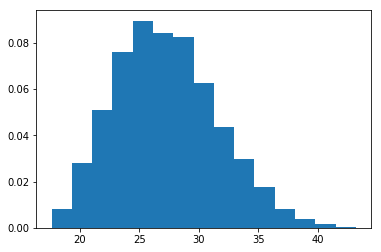

In [10]:
plt.hist(df['age'], density=True, bins=15)
plt.show()

Математическое ожидание и дисперсия для непрерывной случайной величины также считаются иначе, чем для дискретной. 

Формула для математического ожидания:

$$M(X) = \displaystyle\int_{-\infty}^\infty x \cdot f(x) \: dx$$

Формула для дисперсии:

$$D(X) = \displaystyle\int_{-\infty}^\infty (x - M(X))^2 \cdot f(x) \: dx$$

### Примеры непрерывных распределений

Непрерывная случайная величина $X$ имеет __равномерное распределение__ на отрезке $[a, b]$, если её плотность внутри этого отрезка постоянна, а вне этого отрезка равна 0. Её плотность распределения:

$$
f(x) = \begin{cases}
\dfrac{1}{b - a}, & x \in [a, b], \\
0, & x \not\in [a, b].
\end{cases}
$$

__Пример 3.1__

Выборку из равномерного распределения можно получить с помощью функции `uniform` из модуля `numpy.random`. Построим выборку из равномерного распределения с параметрами $a = -1.5$, $b = 2.5$.

In [11]:
a = -1.5
b = 2.5

In [25]:
samples = np.random.uniform(a, b, size=10000)

print(samples)

[ 2.28641011  0.6098992  -1.26744544 ...  0.94421716  1.302148
  1.07157064]


Построим эмпирическую функцию распределения.

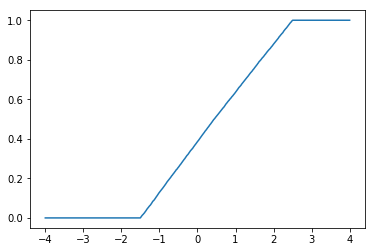

In [22]:
ox = np.linspace(-4, 4, 1000)
oy = np.array([edf(samples=samples, x=x) for x in ox])

plt.plot(ox, oy)

Построим гистограмму, чтобы визуализировать функцию плотности. Вместе с ней построим теоретическую функцию плотности.

In [23]:
# probability density function

def pdf_uniform(a, b, x):
    return 1 / (b - a) if a <= x <= b else 0

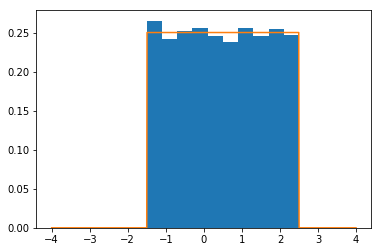

In [26]:
oy = np.array([pdf_uniform(a, b, x) for x in ox])

plt.hist(samples, density=True)
plt.plot(ox, oy)

Математическое ожидание и дисперсия равномерного распределения:

$$M(X) = \dfrac{a + b}{2}, \text{ } D(X) = \dfrac{(b - a)^2}{12}.$$

__Пример 3.2__

Математическое ожидание распределения из предыдущего примера равно

$$M(X) = \dfrac{a + b}{2} = \dfrac{-1.5 + 2.5}{2} = \dfrac{1}{2}.$$

Посчитаем выборочное среднее от выборки:

In [27]:
samples.mean()

0.49062207414253073

Дисперсия этого распредлеения равна

$$D(X) = \dfrac{(b - a)^2}{12} = \dfrac{4^2}{12} = \dfrac{4}{3} \approx 1.333.$$

Выборочная дисперсия (смещённая) от выборки:

In [30]:
samples.var()

1.3426638453584416

В модуле `scipy.stats` есть готовые функции распределения и плотности для многих известных распределений.

### `scipy.stats`

В модуле `scipy.stats` содержатся реализации основных функций для различных распределений:
* `binom` — биномиальное,
* `poisson` — Пуассоновское,
* `geom` — геометрическое,
* `norm` — нормальное,
* `uniform` — непрерывное равномерное,

и др. 

Доступные функции:
* `pmf` — закон распределения для дискретных величин,
* `pdf` — функция плотности для непрерывных величин,
* `cdf` — функция распределения,
* `ppf` — квантильная функция (обратная к функции распределения).

и др. Например, с помощью этого модуля можно получить значения функции нормального распределения, которая не вычисляется аналитически и доступна лишь численно.

In [ ]:
from scipy import stats

In [ ]:
ox = np.linspace(0, 16, 1000)
oy = stats.norm.cdf(ox, loc=8, scale=2)  # в качестве аргумента `x` можно подставлять массив

plt.plot(ox, oy)

При многократном использовании функций одного и того же распределения удобнее сразу зафиксировать объект:

In [6]:
norm = stats.norm(loc=8, scale=2)

norm.pdf(6), norm.cdf(6), norm.ppf(0.16)

(0.12098536225957168, 0.15865525393145707, 6.011084233580494)

Непрерывная случайная величина $X$ имеет __нормальное распределение__ с параметрами $a$ и $\sigma > 0$, если её плотность распределения задаётся формулой

$$f(x) = \dfrac{1}{\sigma \sqrt{2 \pi}} \: e^{- \dfrac{(x - a)^2}{2 \sigma^2}}.$$

Нормальное распределение является одним из наиболее распространённых на практике. Например, нормально распределены:

* рост, вес людей
* показатели IQ
* время прихода на работу
* скорость движения молекул в жидкостях и газах

Как правило, нормально распределёнными являются случайные величины, описывающие события, которые зависят от большого числа слабо связанных случайных факторов.

__Пример 4__

Выборку из нормального распределения можно получить с помощью функции `normal` из модуля `numpy.random`. Построим такую выборку с параметрами $a = 3$, $\sigma = 2$.

In [9]:
loc = 3
scale = 2

In [10]:
samples = np.random.normal(loc, scale, size=10000)

print(samples)

[ 4.19252907 -0.018943    1.42494481 ...  3.34283801  5.9187996
  2.78472502]


Эмпирическая функция распределения:

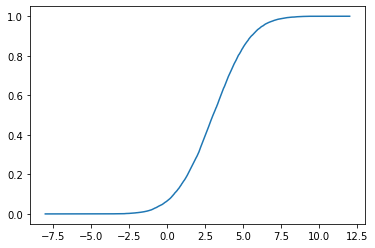

In [13]:
ox = np.linspace(-8, 12, 1000)
oy = np.array([edf(samples, x) for x in ox])

plt.plot(ox, oy)

Гистограмма выборки и теоретическая функция плотности:

In [14]:
def pdf_normal(loc, scale, x):
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

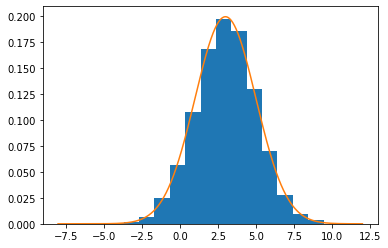

In [15]:
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=15)
plt.plot(ox, oy)

Вместо созданной функции pdf_normal() можно использовать встренную фукнцию pdf, котоая позволяет найти функцию плотности  

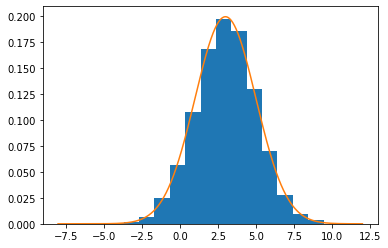

In [16]:
oy = np.array([stats.norm.pdf(x, loc, scale) for x in ox])

plt.hist(samples, density=True, bins=15)
plt.plot(ox, oy)

Математическое ожидание и дисперсия нормального распределения:

$$M(X) = a, \text{ } D(X) = \sigma^2.$$

__Пример 5__

Математическое ожидание распределения из предыдущего примера равно 3. Посчитаем выборочное среднее:

In [44]:
samples.mean()

2.99428656985723

Дисперсия равна 4. Выборочная дисперсия:

In [45]:
samples.var()

3.934339493532729

Для вычисления разброса значений нормально распределённой случайной величины можно использовать следующие правила:

* Интерквартильный размах такой величины содержит 50% её вероятностной массы (т.е. с вероятностью 50% данная величина попадает в этот интервал).
* Интервал от $a - \sigma$ до $a + \sigma$ содержит около 68% вероятностной массы.
* От $a - 2\sigma$ до $a + 2\sigma$ — около 95% массы (__правило двух сигм__).
* От $a - 3\sigma$ до $a + 3\sigma$ — около 99.7% массы (__правило трёх сигм__).

__Пример 6__

Вернёмся к данным о хоккеистах и рассмотрим столбец с ростом. Построим его гистограмму.

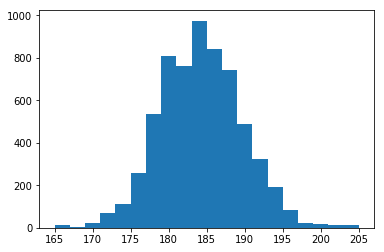

In [46]:
plt.hist(df['height'], bins=20)
plt.show()

Мы знаем, что рост - одна из величин, которая может распределяться нормально. Восстановим по выборке значения $a$ и $\sigma$ и построим поверх гистограммы теоретическую функцию плотности.

In [47]:
loc = df['height'].mean()
scale = df['height'].std()

In [48]:
loc, scale

(183.81150667514305, 5.3838577104381)

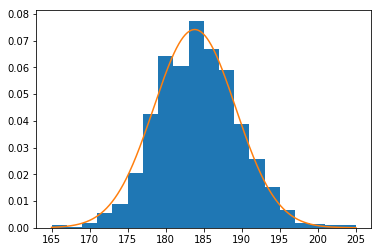

In [49]:
ox = np.linspace(165, 205, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(df['height'], density=True, bins=20)
plt.plot(ox, oy)

__Распределение Стьюдента__

В статистике часто приходится работать с выборочными средними. Например, оценивать средние показатели, средние ошибки и пр. Как именно это делается, мы поговорим на следующем занятии.

В случае с нормальным распределением всё практически идеально за счёт его __устойчивости__. Это означает, что с нормальными распределениями можно проводить различные арифметические операции, и нормальное распределение останется нормальным. 

В частности, если дана выборка $X = \left\{ X_1, \dots, X_n \right\}$ из нормального распределения с параметрами $\mu$, $\sigma$, то распределение выборочного среднего $\overline{X}$ также нормально с параметрами
$$\mu, \:\: \sigma / \sqrt{n},$$
где $n$ — размер выборки.

Пойдём немного дальше. Рассмотрим статистику
$$Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}}$$

Здесь мы из выборочного среднего $\overline{X}$ сначала вычитаем $\mu$, а затем делим весь результат на $\sigma / \sqrt{n}$ — число, которое является средним квадратическим отклонением распределения $\overline{X}$. В силу арифметических свойств нормального распределения, статистика $Z$ имеет стандартное нормальное распределение.

Указанная выше статистика так и называется: __Z-статистика__. Она часто используется в статистических методах.

Однако, у Z-статистики есть один изъян: она предполагает, что нам заранее известен параметр $\sigma$ распределения нашей выборки. На практике такое случается довольно редко: как правило, нам просто дана выборка, и всё.

А что если мы попробуем параметр $\sigma$ в формуле Z-статистики заменить на его оценку $\sigma_X$, сделанную по выборке? Получится __t-статистика__:
$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}}$$

Такая статистика и используется в ситуациях, когда параметр $\sigma$ нам не дан. Эта статистика имеет несколько иное распределение, а именно __распределение Стьюдента__. Распределение Стьюдента имеет один параметр $df$, равный $n - 1$, где $n$ — число элементов в выборке.

Визуально графики распределения Стьюдента похожи на графики нормального распределения, однако, они немного отличаются для небольших $n$. Для $n > 30$ отличие уже малозаметно.

В библиотеке `scipy` распределение Стьюдента представлено объектом `scipy.stats.t`.

__Другие непрерывные распределения__

* __Экспоненциальное__ (или __показательное__) распределение (`scipy.stats.expon`): время между последовательными свершениями одного и того же события. Является непрерывным аналогом геометрического распределения. Функция плотности:
$$
    f(x) = \begin{cases}
    \lambda e^{- \lambda x}, & x \geq 0, \\
    0, & x < 0.
    \end{cases}
$$

* Распределение Фишера (`scipy.stats.f`).
* Распределение $\chi^2$ (хи-квадрат, `scipy.stats.chi2`).
* Распределение Колмогорова (`scipy.stats.ksone`).

### Центральная предельная теорема

Ранее мы отмечали, что, как правило, случайные величины, описывающие события, которые зависят от большого числа слабо связанных случайных факторов, являются нормально распределёнными.
Это правило хорошо иллюстрирует центральная предельная теорема.

Рассмотрим выборку из $n$ значений случайной величины $X$ и пусть $Y$ — сумма этих значений. Как мы знаем, $Y$ также является случайной величиной. Какое распределение имеет эта величина?

__Центральная предельная теорема__ утверждает: чем больше $n$, тем ближе распределение величины $Y$ к нормальному распределению с параметрами

$$a = n \cdot M(X), \text{ } \sigma^2 = n \cdot D(X).$$

Аналогично, если в качестве $Y$ брать не сумму, а среднее значений выборки, то с увеличением $n$ распределение этого значения будет всё ближе к нормальному распределению с параметрами

$$a = M(X), \text{ } \sigma^2 = \dfrac{D(X)}{n}.$$

Отметим, что центральная предельная теорема работает не только для непрерывных случайных величин, но и для дискретных.



__Зачем это нужно__

В реальных ситуациях у нас нет возможности генерировать большое количество выборок. Как правило, у нас есть только одна. Вычисляя, например, выборочное среднее, мы получим только одно значение. Зачем тогда нужна центральная предельная теорема?

ЦПТ позволяет пролить свет на распределение этого самого выборочного среднего. Т.е. благодаря ЦПТ, мы знаем, какие значения выборочного среднего __можно ожидать__, будь у нас ещё одна или несколько выборок. 

Сравнение ожидаемых и наблюдаемых значений является ключевым моментом при проверке статистических гипотез, о которых мы поговорим на следующем занятии. 

__Пример 7__

Проверим утверждение центральной предельной теоремы на равномерном распределении $X$ с параметрами $a = -1.5$,
$b = 2.5$. Для этого при различных $n$ сформируем $n$ выборок размера, например, $10^4$, а затем посчитаем от них поэлементно среднее. Таким образом, мы получим одну выборку размера $10^4$. Теорема утверждает, что чем больше $n$, тем больше эта выборка похожа на выборку из некоторого нормального распределения $Y$.

Математическое ожидание величины $X$ равно $\dfrac{a + b}{2} = \dfrac{1}{2}$. Дисперсия: 
$\dfrac{(b - a)^2}{12} = \dfrac{4^2}{12} = \dfrac{4}{3}$. Это означает, что нормальное распределение $Y$ имеет параметры $a = \dfrac{1}{2}$, $\sigma^2 = \dfrac{4}{3n}$.

In [50]:
a = -1.5
b = 2.5

m = (a + b) / 2
d = ((b - a) ** 2) / 12

n_samples = 10 ** 4

In [52]:
def get_mean_samples_uniform(n):
    samples = np.random.uniform(a, b, size=(n, n_samples))
    
    return samples.mean(axis=0)

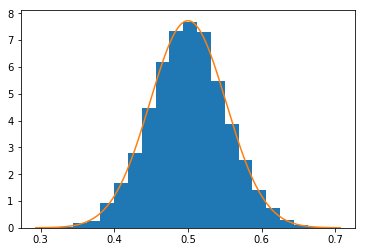

In [65]:
n = 500

loc = m
scale = np.sqrt(d / n)

samples = get_mean_samples_uniform(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)

### Упражнение

__Задача 1__

О непрерывной равномерно распределенной случайной величине `B` известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины `B` и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

__Задача 2__

Рост взрослого населения города `X` имеет нормальное распределение, причем, средний рост равен 174 см, а среднее квадратическое отклонение равно 8 см. посчитайте, какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
1. больше 182 см?
2. больше 190 см?
3. от 166 см до 190 см?
4. от 166 см до 182 см?
5. от 158 см до 190 см?
6. не выше 150 см или не ниже 190 см?
7. не выше 150 см или не ниже 198 см?
8. ниже 166 см?

Задачу можно решить двумя способами: без использования сторонних библиотек (`numpy`, `scipy`, `pandas` и пр.), а затем проверить себя с помощью встроенных функций

__Задача 3 (Дополнительно)__

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

_Подсказка_. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение `scale`, для которого значение `cdf(x=1, loc=1.06, scale=scale)` близко к 0.05. Точности 0.0001 будет достаточно.
